# NFT Analytics Project

### Import Libraries

In [108]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Get NFT's owned by a wallet address

In [109]:
walletAddress = input("Enter wallet address to use") #0xb2af1b81283C87A9F06bA2294dca29f83A7D1d00

def getNFTs(walletAddress):
    """Gets the NFT's owned by a specific wallet address and returns a JSON response object"""
    
    url = f"https://api.verbwire.com/v1/nft/data/owned?walletAddress={walletAddress}&chain=ethereum"

    headers = {
        "accept": "application/json",
        "X-API-Key": "sk_live_44463b61-a57b-47a0-a501-bd5ab8c2e71f"
    }

    response = requests.get(url, headers=headers)
    return response.json()


### Get's Sales Event for a slug

In [110]:
slug = input("Enter a slug to use") #boredapeyachtclub

def getSalesEvent(slug):
    """Gets the sales events of a slug and returns a JSON response object"""
    
    limit = input("Enter a limit")
    offset = input("Enter an offset")
    sortDirection = input("Enter DESC or ASC")
    url = f"https://api.verbwire.com/v1/nft/data/salesEventsForSlug?slug={slug}&chain=ethereum&limit={limit}&offset={offset}&sortDirection={sortDirection}"

    headers = {
        "accept": "application/json",
        "X-API-Key": "sk_live_44463b61-a57b-47a0-a501-bd5ab8c2e71f"
    }

    response = requests.get(url, headers=headers)
    return response.json()


### Analysis

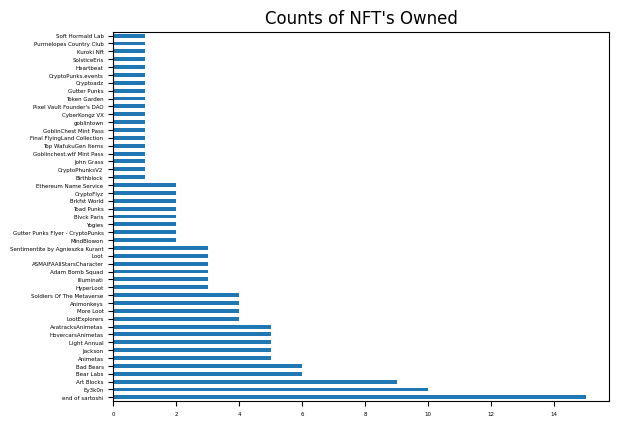

In [111]:
nft = pd.DataFrame(getNFTs(walletAddress)["nfts"])
nft["tokenName"].value_counts().plot(kind="barh", fontsize=6, title="Counts of NFT's Owned")
plt.show()

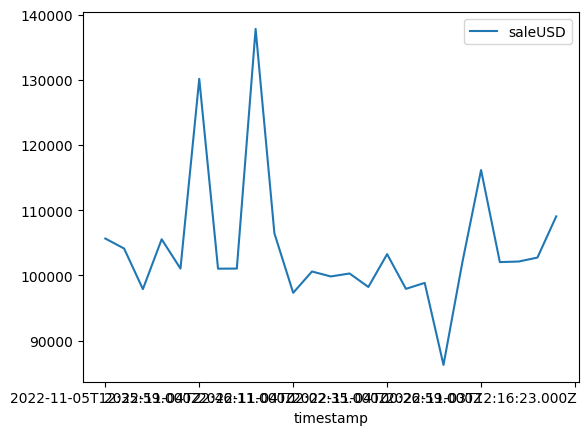

In [117]:
salesEvents = pd.DataFrame(getSalesEvent(slug)["sales"])
salesEvents
salesEvents.plot(kind="line", x="timestamp", y="saleUSD")
plt.show()